In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.375.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.704.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.8597.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5740.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5703.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7717.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2618.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.1956.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5608.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5646.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7267.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5341.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7792.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2888.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.3808.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.838

In [2]:
train_df = '/kaggle/input/dogs-vs-cats/train'
test_df = '/kaggle/input/dogs-vs-cats/test'

In [22]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress INFO and WARNING messages

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization, Dropout

In [4]:
#generators == divide data in batches
# Keras generators, particularly the ImageDataGenerator class, are powerful tools used for efficient data loading and on-the-fly data augmentation in deep learning models, especially for image classification tasks.

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = train_df,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = test_df,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.


I0000 00:00:1752414163.680123      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752414163.680871      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 5000 files belonging to 2 classes.


In [6]:
#Noramalize == convert all to pixel values from 0 to 1
def process(image,label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
#Create CNN Model

model = Sequential()

model.add(Conv2D(32,
                 kernel_size=(3,3),
                 padding = 'valid',
                 activation= 'relu',
                 input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = 2,
                       padding = 'valid'))

model.add(Conv2D(64,
                 kernel_size=(3,3),
                 padding = 'valid',
                 activation= 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = 2,
                       padding = 'valid'))

model.add(Conv2D(128,
                 kernel_size=(3,3),
                 padding = 'valid',
                 activation= 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = 2,
                       padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer = 'adam',loss= 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [11]:
history = model.fit(train_ds, epochs=10,validation_data = validation_ds)

Epoch 1/10


I0000 00:00:1752414170.288368     110 service.cc:148] XLA service 0x7b885000d300 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752414170.289108     110 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752414170.289126     110 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752414170.834496     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/625 ━━━━━━━━━━━━━━━━━━━━ 33s 55ms/step - accuracy: 0.5000 - loss: 1.0718

I0000 00:00:1752414176.431632     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - accuracy: 0.5904 - loss: 0.6810 - val_accuracy: 0.7066 - val_loss: 0.5690
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7486 - loss: 0.5129 - val_accuracy: 0.7866 - val_loss: 0.4574
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.8106 - loss: 0.4081 - val_accuracy: 0.7896 - val_loss: 0.4761
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.8785 - loss: 0.2856 - val_accuracy: 0.7818 - val_loss: 0.6082
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.9377 - loss: 0.1596 - val_accuracy: 0.7692 - val_loss: 0.9968
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9646 - loss: 0.0986 - val_accuracy: 0.7608 - val_loss: 1.0788
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.9751 - loss: 0.0747 - val_accuracy: 0.7844 - val_loss: 1.1376
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9809 - loss: 0.0533 - val_accurac

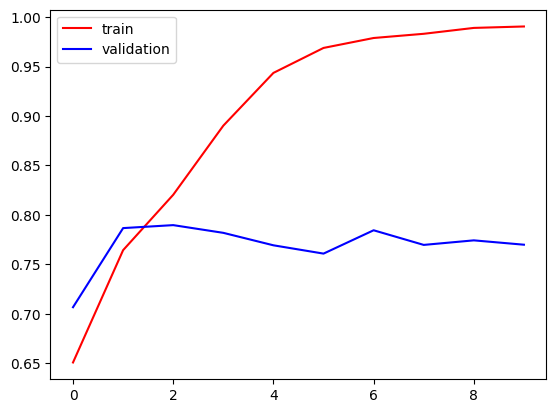

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label= 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

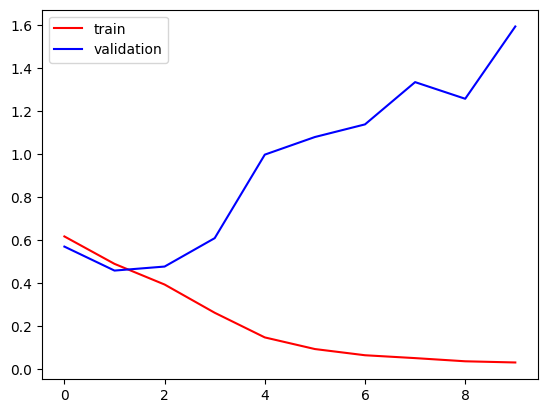

In [18]:
plt.plot(history.history['loss'],color='red',label= 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

In [19]:
#ways to reduce overfitting

#Add more data
# Data Augumentation
#L1/L2 regularization
# DropOut
# Batch Norm
# Reduce Complexity

In [23]:
#Create CNN Model

model = Sequential()

model.add(Conv2D(32,
                 kernel_size=(3,3),
                 padding = 'valid',
                 activation= 'relu',
                 input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = 2,
                       padding = 'valid'))

model.add(Conv2D(64,
                 kernel_size=(3,3),
                 padding = 'valid',
                 activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = 2,
                       padding = 'valid'))

model.add(Conv2D(128,
                 kernel_size=(3,3),
                 padding = 'valid',
                 activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = 2,
                       padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
model.compile(optimizer = 'adam',loss= 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
history = model.fit(train_ds, epochs=10,validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.5664 - loss: 3.0784 - val_accuracy: 0.6174 - val_loss: 0.6761
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.6549 - loss: 0.6246 - val_accuracy: 0.5416 - val_loss: 0.8177
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.7258 - loss: 0.5399 - val_accuracy: 0.7370 - val_loss: 0.5148
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.7752 - loss: 0.4724 - val_accuracy: 0.7556 - val_loss: 0.5002
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8073 - loss: 0.4145 - val_accuracy: 0.7898 - val_loss: 0.4640
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8424 - loss: 0.3611 - val_accuracy: 0.7734 - val_loss: 0.5282
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.8710 - loss: 0.2935 - val_accuracy: 0.7618 - val_loss: 0.6558
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.8987 - loss: 0.2453 - 

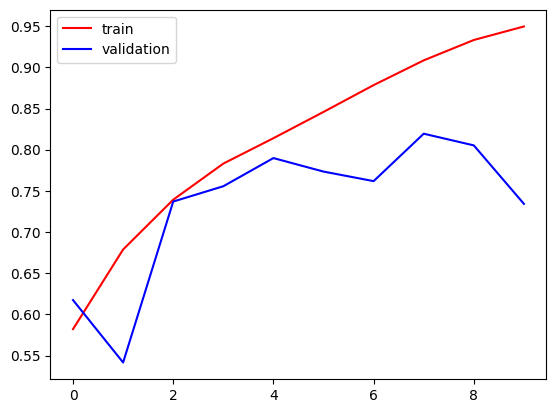

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label= 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

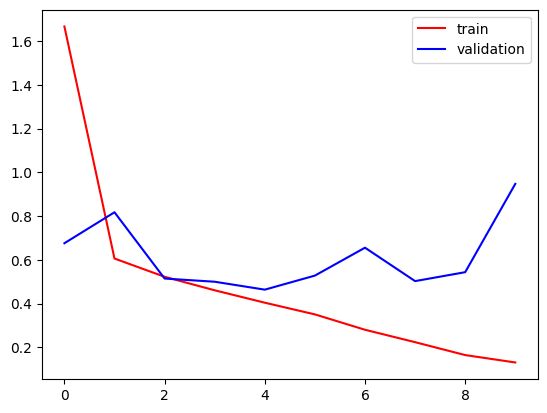

In [28]:
plt.plot(history.history['loss'],color='red',label= 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()